In [1]:
import pymysql

# connect database

In [2]:
db = pymysql.connect("***","***","***","***",charset='utf8')

In [3]:
cursor = db.cursor()

In [4]:
sql = "SELECT * FROM RAW_DATA_train"

In [5]:
try:
   # 执行SQL语句
   cursor.execute(sql)
   # 获取所有记录列表
   results = cursor.fetchall()
except:
   print ("Error: unable to fetch data")


In [6]:
print(type(results))

<class 'tuple'>


In [7]:
print(results[0][2])

(Lateral boosters can pinch in the sides if youve found a gym in the last few years too.)Weve found that the front seats are widely adjustable and we think that most body types wont have a hard time finding a natural position in the drivers seat—provided you can swipe the keys first.Outward visibility in the Q60 is generally good, and bulges over the front tires should help drivers place the front wheels despite the coupes long hood.


In [8]:
martir=[]
for row in results:
    #print(type(row[1]))
    label=row[1]
    text=row[2]
    pair=[]
    pair.append(label)
    pair.append(text)
    martir.append(pair)

In [9]:
import numpy as np

In [10]:
mat_array=np.array(martir)

In [11]:
print(mat_array.dtype)

<U2630


In [12]:
print(mat_array.shape)

(101286, 2)


In [13]:
print(mat_array[0][0])


exterior


In [14]:
DIS_SQL="SELECT DISTINCT label FROM RAW_DATA_train"
try:
   # 执行SQL语句
   cursor.execute(DIS_SQL)
   # 获取所有记录列表
   label_results = cursor.fetchall()
except:
   print ("Error: unable to fetch data")
 
# 关闭数据库连接
db.close()

In [15]:
print(label_results)

(('exterior',), ('driving',), ('safety',), ('performance',), ('space',), ('interior',), ('fuel economy',))


In [16]:
mapping_dict={'exterior':'1','driving':'2','safety':'3','performance':'4','space':'5','interior':'6','fuel economy':'7'}

In [17]:
for i in mat_array:
    i[0]=mapping_dict[i[0]]

In [18]:
print(mat_array.shape)

(101286, 2)


In [19]:
print(mat_array[0:10])

[['1'
  '(Lateral boosters can pinch in the sides if youve found a gym in the last few years too.)Weve found that the front seats are widely adjustable and we think that most body types wont have a hard time finding a natural position in the drivers seat—provided you can swipe the keys first.Outward visibility in the Q60 is generally good, and bulges over the front tires should help drivers place the front wheels despite the coupes long hood.']
 ['1'
  '(Read more about how we rate cars.)By the numbers, the SL-Class has 101.7 inches between the wheels, but most of that space is dedicated to the long hood or power-operated convertible top holder (aka trunk).']
 ['1'
  '(Read more about how we rate cars.)The Cherokees interior materials are a notch above the competition and Jeep has updated the look this year with contrasting lighter colors on lower panels.']
 ['1'
  '(Read more about how we rate cars.)The Continentals power cloth convertible top is a high-quality woven unit that does a 

In [20]:
mat_array[0]

array(['1',
       '(Lateral boosters can pinch in the sides if youve found a gym in the last few years too.)Weve found that the front seats are widely adjustable and we think that most body types wont have a hard time finding a natural position in the drivers seat—provided you can swipe the keys first.Outward visibility in the Q60 is generally good, and bulges over the front tires should help drivers place the front wheels despite the coupes long hood.'],
      dtype='<U2630')

In [21]:
mat=np.array([[1,2,3],[1,2,3]])

In [22]:
np.savetxt('test.csv', mat, delimiter = ',')

In [23]:
np.savetxt('input.csv',mat_array,fmt='%s',delimiter=',')

In [24]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [25]:
df=DataFrame(mat_array)

In [26]:
df=df.sample(frac=1).reset_index(drop=True)

In [27]:
df.head(10)

,0,1
0,1,The instant recognizability of the silhouette ...
1,4,An optional 6.8-liter V10 produces 362 hp and ...
2,6,"The L features 16-inch steel wheels, air-condi..."
3,5,It provides minimal legroom even for kids and ...
4,3,"And in the new, revised federal tests for 2011..."
5,5,With seating for 12 passengers or room for a r...
6,4,The 2008 Subaru Legacy lineup spans a price ra...
7,2,The SE's recalibrated suspension gives it even...
8,2,An optional package bundles stability and trac...
9,7,We find Subaru's CVT to be one of the best of ...


In [28]:
df.columns = ['label','text']

In [29]:
df.head(10)

,label,text
0,1,The instant recognizability of the silhouette ...
1,4,An optional 6.8-liter V10 produces 362 hp and ...
2,6,"The L features 16-inch steel wheels, air-condi..."
3,5,It provides minimal legroom even for kids and ...
4,3,"And in the new, revised federal tests for 2011..."
5,5,With seating for 12 passengers or room for a r...
6,4,The 2008 Subaru Legacy lineup spans a price ra...
7,2,The SE's recalibrated suspension gives it even...
8,2,An optional package bundles stability and trac...
9,7,We find Subaru's CVT to be one of the best of ...


In [30]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/I348655/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [33]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

In [34]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3, random_state = 12)

In [35]:
df_trn.shape, df_val.shape

((70900, 2), (30386, 2))

In [36]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=df_trn, valid_df=df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [37]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.5)

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [39]:
%matplotlib inline

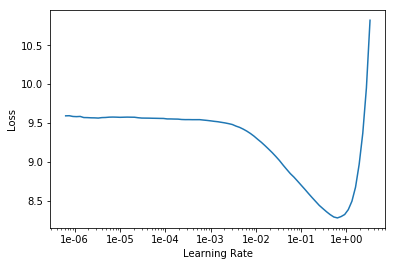

In [40]:
learn.recorder.plot()

In [41]:
learn.save_encoder('ft_enc')

In [42]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.freeze()

In [43]:
gc.collect();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


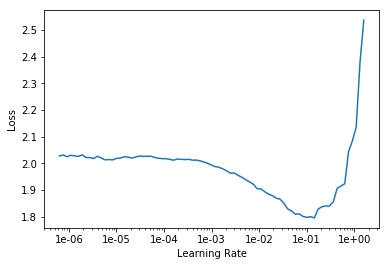

In [44]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.165452,0.653785,0.782367


In [46]:
learn.save('first')

In [47]:
learn.load('first');

In [48]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.622753,0.369122,0.880438


In [49]:
learn.save('second')

In [50]:
learn.load('second');

In [51]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.426709,0.282734,0.906799


In [52]:
learn.save('third')

In [53]:
learn.load('third');

In [54]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.353056,0.256581,0.915092
2,0.355785,0.241961,0.920292


In [55]:
learn.predict("This car is very motivated")

(Category 2,
 tensor(1),
 tensor([0.0281, 0.6674, 0.0317, 0.1439, 0.0739, 0.0043, 0.0507]))

In [56]:
learn.predict("The outlook of the car is not as good as expected")

(Category 2,
 tensor(1),
 tensor([0.0102, 0.5740, 0.0239, 0.1115, 0.1097, 0.0028, 0.1679]))

In [57]:
learn.predict("Between the wheels there are 118.1 inches, and there are 200.8 inches bumper-to-bumper, which puts it on the small side of minivans on the road today. ")

(Category 5,
 tensor(4),
 tensor([0.3817, 0.0392, 0.0076, 0.0210, 0.4930, 0.0015, 0.0559]))

In [59]:
learn.predict("A chrome moustache dips under the rear window for a dressier look, replacing the former black plastic panel. ")

(Category 1,
 tensor(0),
 tensor([9.8041e-01, 2.8604e-04, 1.5792e-03, 4.8620e-04, 1.7658e-03, 1.4486e-02,
         9.8991e-04]))

In [60]:
learn.save("last")